# Optimizations of ZOEE to HadCM3, CESM, Pages2k - p1000

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from ZOEE.modules.configuration import importer, add_sellersparameters, parameterinterpolatorstepwise
from ZOEE.modules.variables import variable_importer, Vars, Base
from ZOEE.modules.optimization import optimization, ZOEE_optimization
#from ZOEE import update_plotstyle, moving_average
from ZOEE.modules.rk4 import rk4alg
#import matplotlib
#update_plotstyle()
#matplotlib.rcParams['lines.linewidth']=1.1

## General optimization setup

In [2]:
Lat_10,ZMT_10=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')

In [3]:
"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup = optimization(mode='Coupled',
                            target=None,
                            ZMT_response=True, 
                            GMT_response=True,
                            response_average_length=30*12,
                            num_steps=20,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_weight='cross_weight',
                            cost_ratio=None,
                            ZMT=ZMT_10+288.15,
                            GMT=288.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""
P0=np.array([70*4.2e6,200,1.9,1.165,1.165,1.165])
#P0=Get_PGamma[0]
Pmin=np.array([1*4.2e6,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100*4.2e6,240,2.5,1.3,1.3,1.3])
P_pert_ratio=1/10000
optimization_setup.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

# HadCM3

## Average of HadCM3 runs

In [3]:
HadCM3_GMT=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850_anomaly.txt',delimiter=',')

In [5]:
"""Import the configuration that is required to run your specific model"""

config_HadCM3=importer('Experiments/HadCM3/Config_HadCM3.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_HadCM3,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_HadCM3,Sellers=add_sellersparameters(config_HadCM3, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_HadCM3 = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,'Coupled',12000,monthly=True)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':HadCM3_GMT[1]}
optimization_setup.num_data=12000
#optimization_setup.response=False
print("Optimization >>> HadCM3 target (average)")
F_HadCM3, dF_HadCM3, P_HadCM3, Ptrans_HadCM3, gamma_HadCM3, data_HadCM3=optimization_setup.optimize(ZOEE_HadCM3,config_HadCM3)

Loading Configuration from: Experiments/HadCM3/Config_HadCM3.ini
Loading Parameters from: ZOEE/config/SellersParameterization.ini


Iteration no.0
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


KeyboardInterrupt: 

In [ ]:
np.savetxt('Experiments/Output/HadCM3_P_20_resp_av.txt',P_HadCM3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_F_20_resp_av.txt',F_HadCM3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_dF_20_resp_av.txt',dF_HadCM3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_ZMT_20_resp_av.txt',data_HadCM3[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_GMT_20_resp_av.txt',data_HadCM3[1][:,0],delimiter=',')

## Single runs

In [4]:
HadCM3_GMT_single=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850_anomaly_single.txt',delimiter=',')

In [ ]:
"""Execute optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':HadCM3_GMT_single[1]}
#optimization_setup.num_data=12000
#optimization_setup.response=False
print("Optimization >>> HadCM3 target (set 1)")
F_HadCM3_s1, dF_HadCM3_s1, P_HadCM3_s1, Ptrans_HadCM3_s1, gamma_HadCM3_s1, data_HadCM3_s1=optimization_setup.optimize(ZOEE_HadCM3,config_HadCM3)

In [ ]:
np.savetxt('Experiments/Output/HadCM3_P_20_resp_s1.txt',P_HadCM3_s1,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_F_20_resp_s1.txt',F_HadCM3_s1,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_dF_20_resp_s1.txt',dF_HadCM3_s1,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_ZMT_20_resp_s1.txt',data_HadCM3_s1[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_GMT_20_resp_s1.txt',data_HadCM3_s1[1][:,0],delimiter=',')

In [ ]:
"""Execute optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':HadCM3_GMT_single[2]}
#optimization_setup.num_data=12000
#optimization_setup.response=False
print("Optimization >>> HadCM3 target (set 2)")
F_HadCM3_s2, dF_HadCM3_s2, P_HadCM3_s2, Ptrans_HadCM3_s2, gamma_HadCM3_s2, data_HadCM3_s2=optimization_setup.optimize(ZOEE_HadCM3,config_HadCM3)

In [ ]:
np.savetxt('Experiments/Output/HadCM3_P_20_resp_s2.txt',P_HadCM3_s2,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_F_20_resp_s2.txt',F_HadCM3_s2,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_dF_20_resp_s2.txt',dF_HadCM3_s2,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_ZMT_20_resp_s2.txt',data_HadCM3_s2[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_GMT_20_resp_s2.txt',data_HadCM3_s2[1][:,0],delimiter=',')

In [ ]:
"""Execute optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':HadCM3_GMT_single[3]}
#optimization_setup.num_data=12000
#optimization_setup.response=False
print("Optimization >>> HadCM3 target (set 3)")
F_HadCM3_s3, dF_HadCM3_s3, P_HadCM3_s3, Ptrans_HadCM3_s3, gamma_HadCM3_s3, data_HadCM3_s3=optimization_setup.optimize(ZOEE_HadCM3,config_HadCM3)

In [ ]:
np.savetxt('Experiments/Output/HadCM3_P_20_resp_s3.txt',P_HadCM3_s3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_F_20_resp_s3.txt',F_HadCM3_s3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_dF_20_resp_s3.txt',dF_HadCM3_s3,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_ZMT_20_resp_s3.txt',data_HadCM3_s3[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_GMT_20_resp_s3.txt',data_HadCM3_s3[1][:,0],delimiter=',')

# CESM

In [ ]:
CESM_GMT=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')

In [ ]:
"""Import the configuration that is required to run your specific model"""

config_CESM=importer('Experiments/CESM/Config_CESM.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_CESM,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_CESM,Sellers=add_sellersparameters(config_CESM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_CESM = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,'Coupled',12000,monthly=True)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execute optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':CESM_GMT[1]}
#optimization_setup.num_steps=2
print("Optimization >>> CESM target (trend)")
F_CESM, dF_CESM, P_CESM, Ptrans_CESM, gamma_CESM, data_CESM=optimization_setup.optimize(ZOEE_CESM,config_CESM)

In [ ]:
np.savetxt('Experiments/Output/CESM_P_20_resp_t.txt',P_CESM,delimiter=',')
np.savetxt('Experiments/Output/CESM_F_20_resp_t.txt',F_CESM,delimiter=',')
np.savetxt('Experiments/Output/CESM_dF_20_resp_t.txt',dF_CESM,delimiter=',')
np.savetxt('Experiments/Output/CESM_ZMT_20_resp_t.txt',data_CESM[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/CESM_GMT_20_resp_t.txt',data_CESM[1][:,0],delimiter=',')

## Detrended Target

In [ ]:
CESM_GMT_dt=np.loadtxt('Experiments/CESM/CESM_850_1850_response_detrend.txt',delimiter=',')

In [ ]:
"""Execute optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':CESM_GMT_dt[1]}
#optimization_setup.num_steps=2
print("Optimization >>> CESM target (detrended)")
F_CESM_dt, dF_CESM_dt, P_CESM_dt, Ptrans_CESM_dt, gamma_CESM_dt, data_CESM_dt=optimization_setup.optimize(ZOEE_CESM,config_CESM)

In [ ]:
np.savetxt('Experiments/Output/CESM_P_20_resp_dt.txt',P_CESM_dt,delimiter=',')
np.savetxt('Experiments/Output/CESM_F_20_resp_dt.txt',F_CESM_dt,delimiter=',')
np.savetxt('Experiments/Output/CESM_dF_20_resp_dt.txt',dF_CESM_dt,delimiter=',')
np.savetxt('Experiments/Output/CESM_ZMT_20_resp_dt.txt',data_CESM_dt[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/CESM_GMT_20_resp_dt.txt',data_CESM_dt[1][:,0],delimiter=',')

# Pages2k

In [ ]:
Pages_GMT=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')

In [ ]:
"""Import the configuration that is required to run your specific model"""

config_Pages=importer('Experiments/Pages2k/Config_Pages.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_Pages,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_Pages,Sellers=add_sellersparameters(config_Pages, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_Pages = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,'Coupled',1000,monthly=False)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':Pages_GMT[1]}
optimization_setup.num_data=1000
optimization_setup.response_average_length=30
#optimization_setup.response=True
print("Optimization >>> Pages target (trend)")
F_Pages, dF_Pages, P_Pages, Ptrans_Pages, gamma_Pages, data_Pages=optimization_setup.optimize(ZOEE_Pages,config_Pages)

In [ ]:
np.savetxt('Experiments/Output/Pages_P_20_resp_t.txt',P_Pages,delimiter=',')
np.savetxt('Experiments/Output/Pages_F_20_resp_t.txt',F_Pages,delimiter=',')
np.savetxt('Experiments/Output/Pages_dF_20_resp_t.txt',dF_Pages,delimiter=',')
np.savetxt('Experiments/Output/Pages_ZMT_20_resp_t.txt',data_Pages[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/Pages_GMT_20_resp_t.txt',data_Pages[1][:,0],delimiter=',')

## Detrended Target

In [ ]:
Pages_GMT_dt=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850_detrend.txt',delimiter=',')

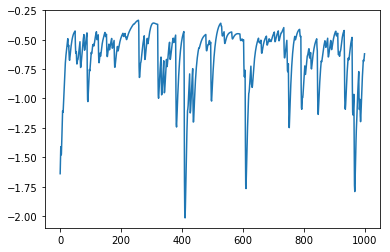

In [24]:
"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""
optimization_setup.target={'ZMT':ZMT_10,'GMT':Pages_GMT_dt[1]}
print("Optimization >>> Pages target (detrended)")
F_Pages_dt, dF_Pages_dt, P_Pages_dt, Ptrans_Pages_dt, gamma_Pages_dt, data_Pages_dt=optimization_setup.optimize(ZOEE_Pages,config_Pages)

In [ ]:
np.savetxt('Experiments/Output/Pages_P_20_resp_dt.txt',P_Pages_dt,delimiter=',')
np.savetxt('Experiments/Output/Pages_F_20_resp_dt.txt',F_Pages_dt,delimiter=',')
np.savetxt('Experiments/Output/Pages_dF_20_resp_dt.txt',dF_Pages_dt,delimiter=',')
np.savetxt('Experiments/Output/Pages_ZMT_20_resp_dt.txt',data_Pages_dt[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/Pages_GMT_20_resp_dt.txt',data_Pages_dt[1][:,0],delimiter=',')

# Optimizations of ZOEE to HadCM3 - LGM

## General optimization setup

In [4]:
Lat_10,HadCM3_LGM_ZMT_target=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMT.csv',delimiter=',')
Lat_10,HadCM3_LGM_ZMT_target_anomaly=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMTanomaly.csv',delimiter=',')
HadCM3_LGM_GMT=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_850_1850_anomaly.txt',delimiter=',')

In [3]:
## ZMT anomaly

"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup_LGM_an = optimization(mode='Coupled',
                            target={'ZMT':HadCM3_LGM_ZMT_target_anomaly,'GMT':HadCM3_LGM_GMT[1]},
                            ZMT_response=True, 
                            GMT_response=True,
                            response_average_length=30*12,
                            num_steps=20,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_weight='cross_weight',
                            cost_ratio=None,
                            ZMT=HadCM3_LGM_ZMT_target,
                            GMT=283.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""

optimization_setup_LGM_an.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

In [ ]:
"""Import the configuration that is required to run your specific model"""

config_HadCM3_LGM=importer('Experiments/HadCM3/Config_HadCM3_LGM.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_HadCM3_LGM,initialZMT=False,parallel=True,parallel_config=parallel_config)
config_HadCM3_LGM,Sellers=add_sellersparameters(config_HadCM3_LGM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
elevation=-0.0065*np.array(Sellers[1][1])
ZOEE_HadCM3_LGM = ZOEE_optimization(6,parameter_labels,parameter_levels,True,elevation,'Coupled',12000,monthly=True)
#model_setup=[2,'ZMT',parameter_labels,parameter_levels,elevation,True]

"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""

print("Optimization >>> HadCM3 LGM target (ZMT anomaly)")
F_HadCM3_LGM_an, dF_HadCM3_LGM_an, P_HadCM3_LGM_an, Ptrans_HadCM3_LGM_an, gamma_HadCM3_LGM_an, data_HadCM3_LGM_an = optimization_setup_LGM_an.optimize(ZOEE_HadCM3_LGM,config_HadCM3_LGM)

In [ ]:
np.savetxt('Experiments/Output/HadCM3_LGM_P_20_resp_an.txt',P_HadCM3_LGM_an,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_F_20_resp_an.txt',F_HadCM3_LGM_an,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_dF_20_resp_an.txt',dF_HadCM3_LGM_an,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_ZMT_20_resp_an.txt',data_HadCM3_LGM_an[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_GMT_20_resp_an.txt',data_HadCM3_LGM_an[1][:,0],delimiter=',')

In [ ]:
# ZMT absolute

"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup_LGM = optimization(mode='Coupled',
                            target={'ZMT':HadCM3_LGM_ZMT_target,'GMT':HadCM3_LGM_GMT[1]},
                            ZMT_response=False, 
                            GMT_response=True,
                            response_average_length=30*12,
                            num_steps=20,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_weight='cross_weight',
                            cost_ratio=None,
                            ZMT=HadCM3_LGM_ZMT_target,
                            GMT=283.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""

optimization_setup_LGM.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

In [ ]:
"""Execture optimize to start the optimization, giving it your model imported in the step before and configuration
required to run your model"""

print("Optimization >>> HadCM3 LGM target (ZMT absolute)")
F_HadCM3_LGM, dF_HadCM3_LGM, P_HadCM3_LGM, Ptrans_HadCM3_LGM, gamma_HadCM3_LGM, data_HadCM3_LGM=optimization_setup_LGM.optimize(ZOEE_HadCM3_LGM,config_HadCM3_LGM)

In [ ]:
np.savetxt('Experiments/Output/HadCM3_LGM_P_20_abs.txt',P_HadCM3_LGM,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_F_20_abs.txt',F_HadCM3_LGM,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_dF_20_abs.txt',dF_HadCM3_LGM,delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_ZMT_20_abs.txt',data_HadCM3_LGM[0][:,0],delimiter=',')
np.savetxt('Experiments/Output/HadCM3_LGM_GMT_20_abs.txt',data_HadCM3_LGM[1][:,0],delimiter=',')